1573350 - Martí Capel Ruiz 
# Netflix Movies and TV Shows:

El primer que he fet ha estat importar el dataset per poder veures quines dades tinc i quina informació puc treure

In [92]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.style.use("seaborn")

dataset = pd.read_csv(f"netflix_titles.csv")
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Atributs del Dataset

- show_id : Indetificador unic per cada serie / pelicula
- type : Et diu si és serie o pelicula
- title : Titol
- director : Director
- cast : Actors principals
- country : País on s'ha fet la producció
- date_added : Data en la que es va afagir a Netflix
- release_year : Any en el que es va treure la sereie / pelicula
- rating : Restricció d'edat donada per un dels 2 organismes oficials **TV Parental Guidelines** o **Motion Picture Association**
- duration : Duració total, numero de minuts en el cas de les pelicules i numero de tmeporades en el cas de les series
- listed_in : Categories
- description : Descripció

els atributs show_id i description els eliminarem ja que de moment no els farem servir per les prediccions

In [93]:
dataset.drop('show_id', axis=1, inplace=True)
dataset.drop('description', axis=1, inplace=True)

data = dataset.values
dataset.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


Ara farem un analisi més concret de alguns dels atributs

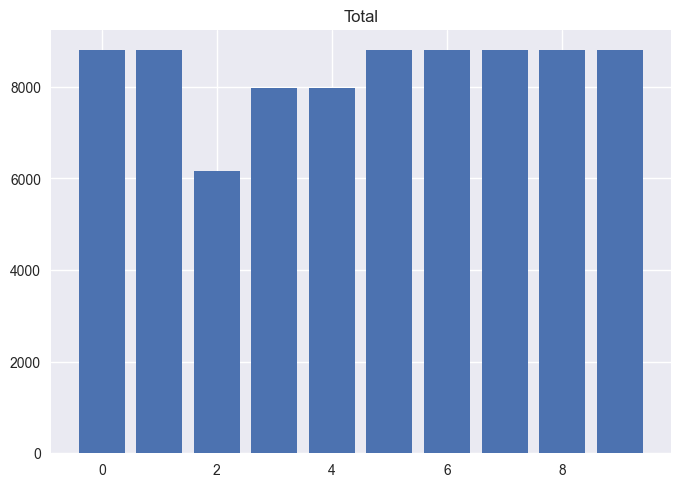

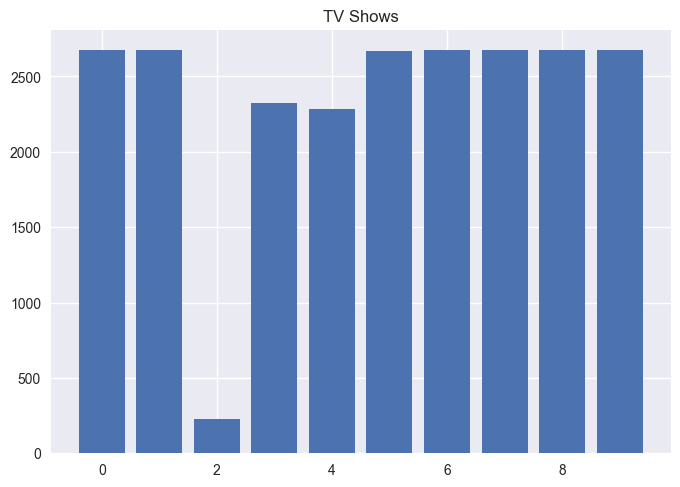

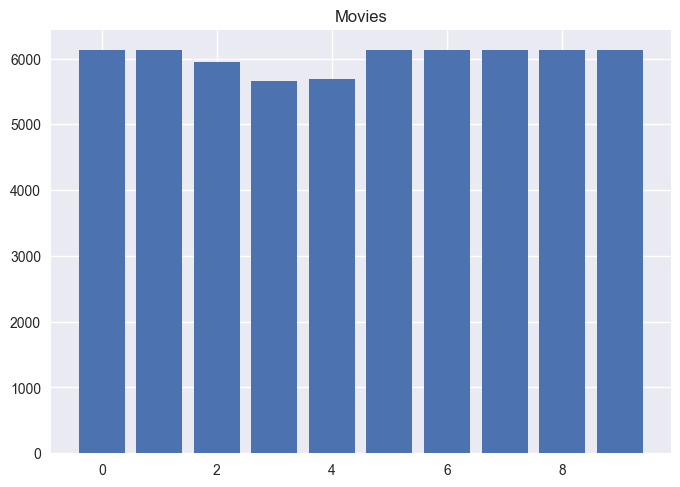

In [94]:
counts = dataset.count()
plt.bar(range(len(counts)), counts)
plt.title("Total")
plt.show()

counts = dataset[dataset['type']=='TV Show'].count()
plt.bar(range(len(counts)), counts)
plt.title("TV Shows")
plt.show()

counts = dataset[dataset['type']=='Movie'].count()
plt.bar(range(len(counts)), counts)
plt.title("Movies")
plt.show()

Aquí es pot veure com hi ha 3 columnes amb un nombre elevat de *None*.

La que té més és la columna **director** la cual te uns 2700 valors *None*. La majoria están en **els TV Show**, la meva suposició és que aquests valors signifiquen que ha participat més de un director en la producció de la serie o de la pelicula, si aixó fos cert, valdria la pena tenir en compte els *None* com un altre valor a l'hora de fer la predicció

Les altres dues columnes són **cast** i **country** les cuals tenen uns 700 valors *None*, això es un 10% de les dades

In [95]:
ratings = dataset['rating'].values.astype(str)
np.unique(ratings[ratings != "nan"], return_counts=True)

(array(['66 min', '74 min', '84 min', 'G', 'NC-17', 'NR', 'PG', 'PG-13',
        'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7',
        'TV-Y7-FV', 'UR'], dtype='<U8'),
 array([   1,    1,    1,   41,    3,   80,  287,  490,  799, 2160,  220,
        3207,  863,  307,  334,    6,    3], dtype=int64))

In [96]:
print("66 min:", dataset[dataset['rating'] == "66 min"]["title"].values)
print("74 min:", dataset[dataset['rating'] == "74 min"]["title"].values)
print("84 min:", dataset[dataset['rating'] == "84 min"]["title"].values)

66 min: ['Louis C.K.: Live at the Comedy Store']
74 min: ['Louis C.K. 2017']
84 min: ['Louis C.K.: Hilarious']


Al fer un analisi dels valors que es poden donar en l'atribut rating, es pot observar com hi apareixen valors de tipus float (es cuals són nan) i també apareixen els deferents tipus de ratings que pot tenir una serie o pelicula, d'aquests cal destacar *NR* (not rated), *UR* (unrated), *66 min*, *74 min* i *84 min*

Els ratings *66 min*, *74 min* i *84 min* són la duració que tenen algunes pelicules, en aquest cas les eliminarem. També eliminearem els valors *NaN*, *NR* i *UR* ja que no ens aporten informació

In [97]:
index = dataset.index[dataset['rating']=="NR"]
index = np.append(index, dataset.index[dataset['rating']=="UR"])
index = np.append(index, dataset.index[dataset['rating']=="66 min"])
index = np.append(index, dataset.index[dataset['rating']=="74 min"])
index = np.append(index, dataset.index[dataset['rating']=="84 min"])

data = dataset.values
data = np.delete(data, np.array(index), 0)

mask = np.where(data[:, 7]!=data[:, 7])
data = np.delete(data, mask, 0)

movie_data = data[data[:, 0]=='Movie', :]
movie_ratings = movie_data[:, 7].astype(str)
print(np.unique(movie_ratings[movie_ratings != "nan"], return_counts=True))

shows_data = data[data[:, 0]=='TV Show', :]
shows_ratings = shows_data[:, 7].astype(str)
print(np.unique(shows_ratings[shows_ratings != "nan"], return_counts=True))

(array(['G', 'NC-17', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV'], dtype='<U8'), array([  41,    3,  287,  490,  797, 1427,  126, 2062,  540,  131,  139,
          5], dtype=int64))
(array(['R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7',
       'TV-Y7-FV'], dtype='<U8'), array([   2,  733,   94, 1145,  323,  176,  195,    1], dtype=int64))


Aquests són els ratings que tenim en el nostre dataset (endreçats per restricció d'edat):

Segons la **Motion Picture Association**:
- G -> Públic general
- PG -> Guia paterna recomenada
- PG-13 -> Guia paterna recomenada per menors de 13
- R -> Menors de 17 requereixen acompanyament
- NC-17 -> Només per majors de 17 anys

Segons la **TV Parental Guidelines**:
- TV-Y -> Per menors de 6 anys
- TV-Y7 -> Per majors de 7 anys
- TV-Y7-FV -> Per majors de 7 anys, conté violencia fantàstica
- TV-G -> Públic general
- TV-PG -> Guia paterna recomenada
- TV-14 -> Per majors de 14 anys
- TV-MA -> Per majors de 17 anys





Ara que les dades estàn separades, faré el model, en el que s'intentarà predir la duració en temporades que te cada una de les series

In [98]:
shows_data = np.delete(shows_data, 0, 1)
shows_data = np.delete(shows_data, 0, 1)
shows_data = np.delete(shows_data, 0, 1)

mask = np.where(shows_data[:, 0]!=shows_data[:, 0])
shows_data = np.delete(shows_data, mask, 0)

column_labels = ["cast", "country", "date_added", "release_year", "rating", "duration", "listed_in"]

new_dataset = pd.DataFrame(data = shows_data, columns = column_labels)
new_dataset.head()


,cast,country,date_added,release_year,rating,duration,listed_in
0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
1,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
3,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
4,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"


Eliminem la columna director ja que té més de un 90% de NaN i eliminem les files que tenen un NaN en la columna cast, també eliminem la columna title ja que és unic per a cada pelicula i no ens aporta informació i la columna type ja que ja no la necessitem

Ara farem una base de dades dels actors per fer algunes conversions de les dades per poder utilitzarles en un model

In [99]:
def most_frequent(List):
    return max(set(List), key = List.count)

actors = {}
for i, cast in enumerate(new_dataset["cast"]):
    for actor in cast.split(", "):
        if actor not in actors.keys():
            actors[actor] = {}
            actors[actor]["popularity"] = 1
            actors[actor]["nationality"] = []
        else:
            actors[actor]["popularity"] += 1
        if shows_data[i, 1] == shows_data[i, 1]:
            actors[actor]["nationality"].append(shows_data[i, 1])

for actor in actors.values():
    if (len(actor["nationality"]) != 0):
        actor["nationality"] = most_frequent(actor["nationality"])
    else:
        actor["nationality"] = np.nan

print(f"There are {len(actors)} diferent actors")
actors

There are 14813 diferent actors


{'Ama Qamata': {'popularity': 1, 'nationality': 'South Africa'},
 'Khosi Ngema': {'popularity': 1, 'nationality': 'South Africa'},
 'Gail Mabalane': {'popularity': 1, 'nationality': 'South Africa'},
 'Thabang Molaba': {'popularity': 2, 'nationality': 'South Africa'},
 'Dillon Windvogel': {'popularity': 1, 'nationality': 'South Africa'},
 'Natasha Thahane': {'popularity': 1, 'nationality': 'South Africa'},
 'Arno Greeff': {'popularity': 1, 'nationality': 'South Africa'},
 'Xolile Tshabalala': {'popularity': 1, 'nationality': 'South Africa'},
 'Getmore Sithole': {'popularity': 1, 'nationality': 'South Africa'},
 'Cindy Mahlangu': {'popularity': 2, 'nationality': 'South Africa'},
 'Ryle De Morny': {'popularity': 1, 'nationality': 'South Africa'},
 'Greteli Fincham': {'popularity': 1, 'nationality': 'South Africa'},
 'Sello Maake Ka-Ncube': {'popularity': 1, 'nationality': 'South Africa'},
 'Odwa Gwanya': {'popularity': 1, 'nationality': 'South Africa'},
 'Mekaila Mathys': {'popularity': 1

La base de dades dels actors en servirà per dues coses: 
- per crear una nova columna amb la popularitat mitja dels actors d'aquella serie (en número de series en el que apareixen)
- per substituir els nan de country pel país que més hagin actuat els actors de la serie

In [100]:
def Average(lst):
    return sum(lst) / len(lst)

rows_to_delete = []

actor_pop = np.array([])
for i, cast in enumerate(new_dataset["cast"]):
    cast_pop = []
    for actor in cast.split(", "):
        cast_pop.append(actors[actor]["popularity"])
    actor_pop = np.append(actor_pop, Average(cast_pop))
    
    if new_dataset["country"][i] != new_dataset["country"][i]:
        nationalities = []
        for actor in cast.split(", "):
            if actors[actor]["nationality"] == actors[actor]["nationality"]:
                nationalities.append(actors[actor]["nationality"])
        if nationalities:
            new_dataset["country"][i] = most_frequent(nationalities)
        else:
            rows_to_delete.append(i)
    

   
new_dataset["cast_popularity"] = actor_pop
new_dataset.drop(rows_to_delete, inplace=True) 
new_dataset.drop('cast', axis=1, inplace=True)
new_dataset.head()

,country,date_added,release_year,rating,duration,listed_in,cast_popularity
0,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1.105263
1,"France, Belgium","September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.111111
2,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",1.250000
3,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.625000
4,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",3.250000


Ara només falta eliminar les files en les que date_added és nan

In [101]:
data = new_dataset.values
mask = np.where(data[:, 1]!=data[:, 1])
data = np.delete(data, mask, 0)


column_labels = ["country", "date_added", "release_year", "rating", "duration", "listed_in", "popularity"]
new_dataset = pd.DataFrame(data = data, columns = column_labels)

new_dataset.head()

,country,date_added,release_year,rating,duration,listed_in,popularity
0,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1.105263
1,"France, Belgium","September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.111111
2,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",1.25
3,United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.625
4,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",3.25


Ara que ja tenim tota la informació necessaria per entrenar el model cal preparar-la de forma que es pugui utilitzar, amb les columnes country, rating i listed_in faré un one hot encodig de cada una, la columna date_added la convertiré en el numero de dies que ha passat desde la primera data i la columna duration, passarà a ser un int que representi el numero de temporades. Les columnes release year i popularity ja estan correctes per ser utilitzades

In [102]:
def month_str_to_int(month):
    if month == "January":
        return "01"
    if month == "February":
        return "02"
    if month == "March":
        return "03"
    if month == "April":
        return "04"
    if month == "May":
        return "05"
    if month == "June":
        return "06"
    if month == "July":
        return "07"
    if month == "August":
        return "08"
    if month == "September":
        return "09"
    if month == "October":
        return "10"
    if month == "November":
        return "11"
    if month == "December":
        return "12"

    print(month)
    return 0

def two_digits(day):
    if len(day) == 1:
        return f"0{day}"
    else:
        return day

dates = np.array([], dtype=np.datetime64)
for date in new_dataset["date_added"]:
    mdy = date.strip().replace(",", "").split(" ")
    dates = np.append(dates, np.datetime64(f"{mdy[2]}-{month_str_to_int(mdy[0])}-{two_digits(mdy[1])}"))
    
start_date = np.amin(dates)
days = []

for date in dates:
    days.append((date-start_date).astype(int))

In [103]:
categories = {}
for listed_in in new_dataset["listed_in"]:
    for typ in listed_in.split(", "):
        if typ != "":
            if typ not in categories.keys():
                categories[typ] = 1
            else:
                categories[typ] += 1
            
countries = {}
for cnt in new_dataset["country"]:
    for country in cnt.split(", "):
        if country != "":
            if country not in countries.keys():
                countries[country] = 1
            else:
                countries[country] += 1

print(f"There are {len(categories)} diferent types of TV Shows")
print(categories, end="\n\n")

print(f"There are {len(countries)} diferent countries")
print(countries)

There are 22 diferent types of TV Shows
{'International TV Shows': 1164, 'TV Dramas': 721, 'TV Mysteries': 93, 'Crime TV Shows': 383, 'TV Action & Adventure': 163, 'Romantic TV Shows': 337, 'TV Comedies': 524, 'TV Horror': 71, 'British TV Shows': 202, 'Reality TV': 147, 'Spanish-Language TV Shows': 156, 'Docuseries': 165, 'TV Thrillers': 54, "Kids' TV": 395, 'TV Sci-Fi & Fantasy': 80, 'Anime Series': 170, 'Korean TV Shows': 142, 'Teen TV Shows': 66, 'TV Shows': 9, 'Classic & Cult TV': 25, 'Stand-Up Comedy & Talk Shows': 43, 'Science & Nature TV': 54}

There are 64 diferent countries
{'South Africa': 12, 'France': 81, 'Belgium': 12, 'India': 74, 'United States': 836, 'United Kingdom': 234, 'Thailand': 45, 'Mexico': 62, 'Spain': 59, 'Turkey': 31, 'Australia': 58, 'South Korea': 188, 'Finland': 4, 'Nigeria': 13, 'Japan': 216, 'Canada': 128, 'Singapore': 32, 'Taiwan': 86, 'Mauritius': 2, 'Russia': 12, 'Chile': 5, 'Colombia': 35, 'Ireland': 14, 'Poland': 10, 'Italy': 26, 'Argentina': 20, 'J

Ara, aprofitant que tenim aquests dos diccionaris, podem mostrar quines són les categories amb més TV Shows i quin són els paisos amb més TV Shows

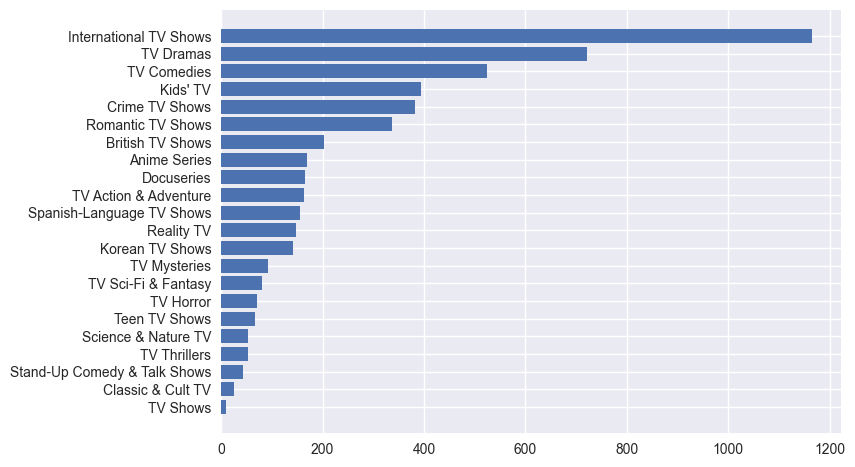

In [104]:
sorted_categories = {k: v for k, v in sorted(categories.items(), key=lambda item: item[1])}

fig, ax = plt.subplots()

ax.barh(list(sorted_categories.keys()), list(sorted_categories.values()))
plt.show()

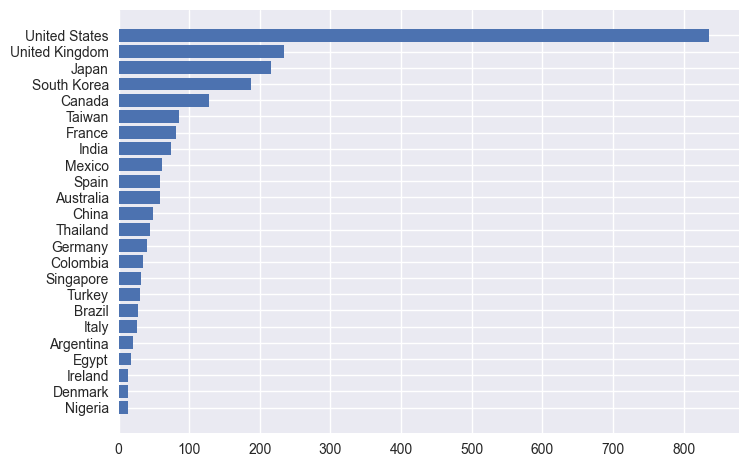

In [105]:
sorted_countries = {k: v for k, v in sorted(countries.items(), key=lambda item: item[1])}

fig, ax = plt.subplots()

ax.barh(list(sorted_countries.keys())[40:], list(sorted_countries.values())[40:])
plt.show()

Com ens podem fixar, Estats units és el pais que més TV Shows te a netflix, cosa que era d'esperar, ja que netflix és una companyia d'Estats Units 

In [106]:
offset = len(categories)

encoder = np.zeros([new_dataset.shape[0], len(categories)+len(countries)])

for i in range(new_dataset.shape[0]):
    for typ in new_dataset["listed_in"][i].split(", "):
        if typ != "":
            encoder[i, list(categories.keys()).index(typ)] = 1
        
    for country in new_dataset["country"][i].split(", "):
        if country != "":
            encoder[i, list(countries.keys()).index(country)+offset] = 1

In [107]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
encoded_rating = ohe.fit_transform(new_dataset[["rating"]])

encoded_rating_dataset = pd.DataFrame(data = encoded_rating.toarray(), columns = list(ohe.categories_[0]))
encoder_dataset = pd.DataFrame(data = encoder, columns = list(categories.keys())+list(countries.keys()))
days_dataset = pd.DataFrame(data = days, columns = ["date_added_in_days"])

dataset = pd.concat([new_dataset, days_dataset, encoded_rating_dataset, encoder_dataset], axis=1)

duration = dataset["duration"]
target = []

for row in duration:
    if int(row[0]) < 4:
        target.append(int(row[0]))
    else:
        target.append(4)

dataset.drop(["country", "date_added", "rating", "listed_in", "duration"], axis=1, inplace=True)

dataset.to_excel("output.xlsx")

ara que ja estan les dades totalment tractades toca fer el model, en aquest cas, he decidit fer un random forest per fer una classificació

El model intantarà predir si la serie tindrà una temporada (tipus 1), dues temporades (tipus 2), tres temporades (tipus 3) o més temporades (tipus 4)

0.6193353474320241


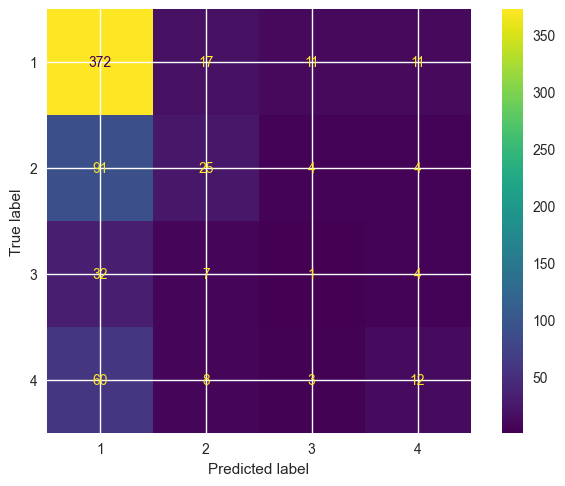

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


X = dataset.values
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [109]:
print(np.unique(y_test, return_counts=True))
print(np.unique(y_pred, return_counts=True))

(array([1, 2, 3, 4]), array([411, 124,  44,  83], dtype=int64))
(array([1, 2, 3, 4]), array([555,  57,  19,  31], dtype=int64))


Finalment podem observar com el model falla al predir masses series com a tipus 1 (una temporada), això pot ser degut a que el training set esta desbalancejat i té masses entrades de tipus 1